## Rede neural MLP simples construída no python
Nesse notebook contém uma rede neural do tipo multiple layer perceptron construída no python, contendo o algorítimo de backpropagation para o treinamento da mesma. A rede neural será treinada para a regressão de um modelo de tensão de um capacitor em um circuito de RC série, o modelo será equacionado posteriormente. 

### Referências:
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [1]:
# Importando as bibliotecas necessárias
import numpy as np                             # para lidar com calculos
import matplotlib.pyplot as plt                # para a plotagem
from IPython.display import Image, display, HTML
import pandas as pd

## Redes neurais artificiais
De forma geral uma rede neural artificial (RNA) pode ser definida como um modelo computacional inspirado nas ligações nervosas de um cerebro, capaz de realizar aprendizado de máquina direcionado para diferentes aplicações. Essa estrutura utiliza de várias unidade de processamento, chamadas de neurônio artificial. Cada neurônio artificial tem entradas, pesos para cada uma das entradas, uma função de ativação e operador de somatória como mostrado abaixo:

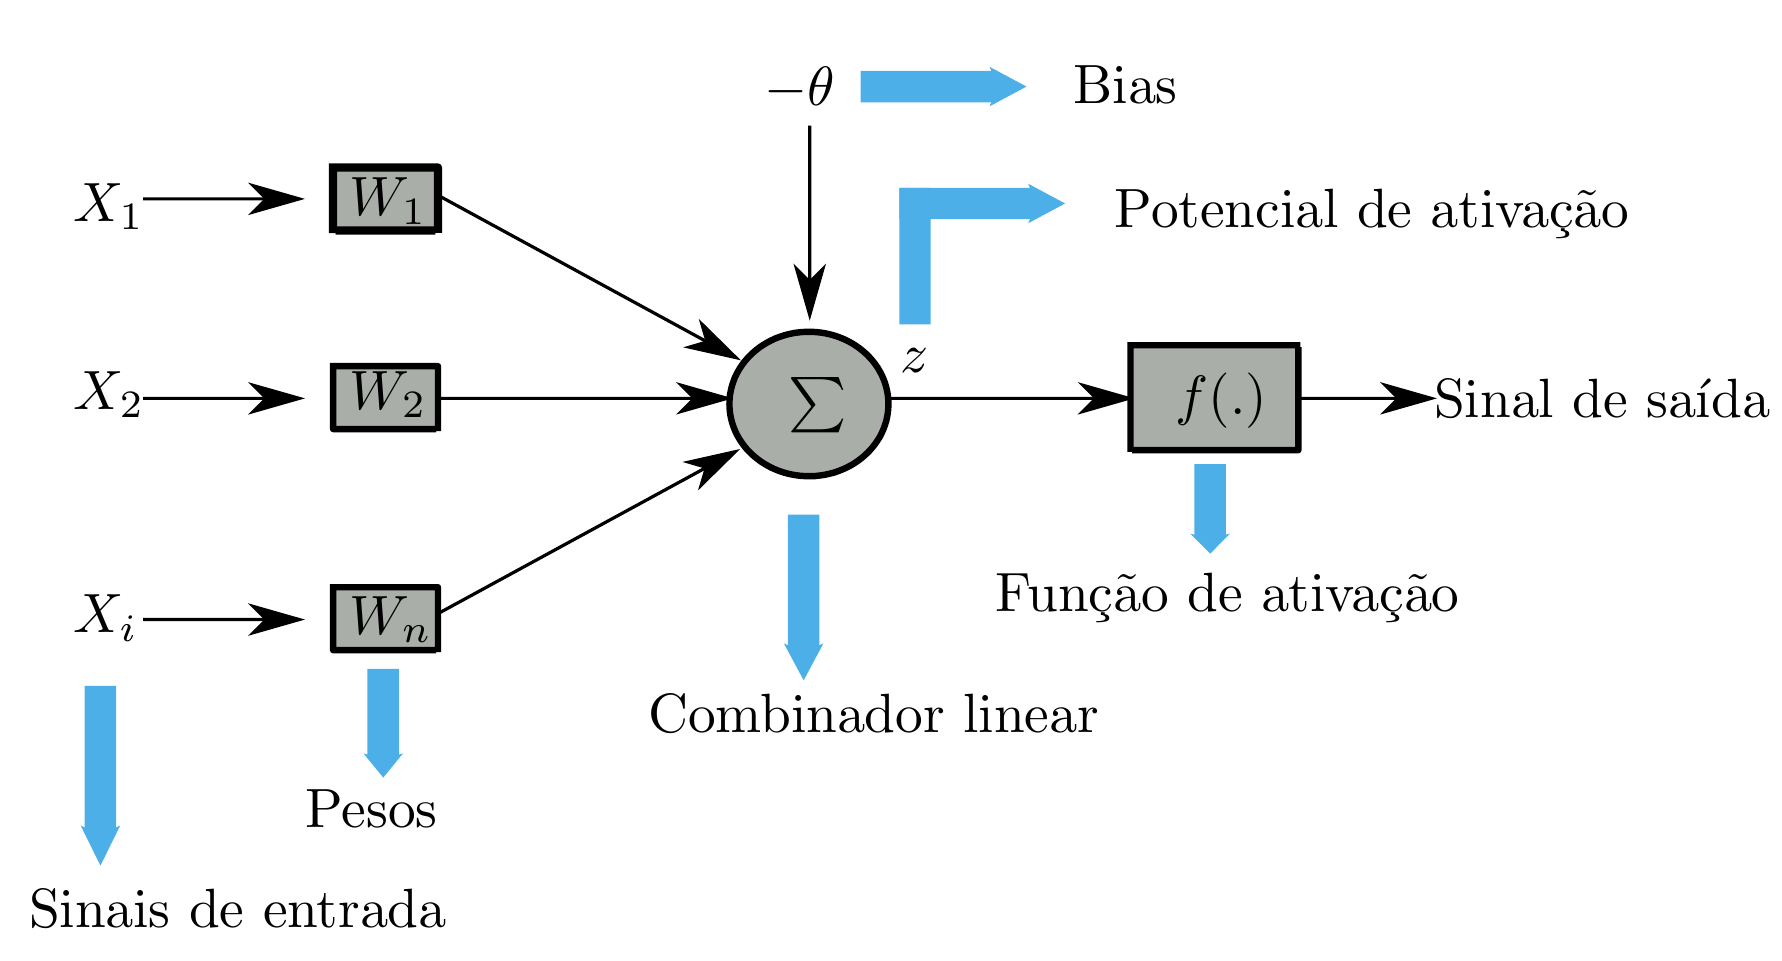

In [2]:
# Função de ativação sigmoid
Image(filename = "imagens/neuron.png", width = 600, height = 300)

Por meio dessa estrutura o neurônio artificial é capaz de concatenar diversas entradas atravês de um combinador linear e uma função de ativação. Os pesos do neurônio servem um fator de ponderamento das entradas, assim conforme esse neurônio e a rede neural forem treinados esses pesos vão mudando de valor e "aprendendo" como mimimizar a função erro (ou custo) escolhida.


### Função sigmoid
A função de ativação escolhida para todos os neurônios desse exemplo é a função sigmoid é $f(x)$ definida como: 
$$f(x)= \frac{1}{1+e^{-x}} (1) $$ 

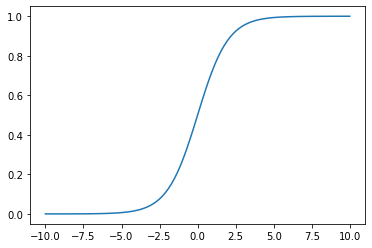

In [3]:
# Função de ativação
def sigmoid(t):
    return 1/(1+np.exp(-t))

args = np.linspace(-10,10,100)
values = sigmoid(args)
plt.plot(args,values)

A função custo escolhida foi a mean squared error (MSE):

In [4]:
# Função para o calculo do erro médio quadratico de 2 arrays
def mse(y1,y2):
    return np.mean(np.square(y1 - y2))

O algorítimo de backpropagation necessita também da derivada da função de ativação, o motivo dessa necessidade será explicado mais a frente nesse notebook. Essa derivada da função sigmoid pode ser escrita como: 
$$f'(x) = f(x) - (1- f(x))$$

In [5]:
# Derivada da função de ativação
def sigmoid_derivative(p):
    return sigmoid(p) * (1 - sigmoid(p))

### Equação da tensão de um capacitor em um circuito RC série
A rede neural será posta a prova em um problema de regressão para testar a sua capacidade de aprendizado. O problema de regressão escolhido é a função da tensão de um capacitor em um circuito RC série com $t>0$, considerando o capacitor descarregado esta pode ser definida como: 
$$ V_c = Vin*(1-e^\tau)$$

Na qual, $Vin$ é a tensão de entrada do sistema e $\tau$ pode ser definido como:
$$ \tau = \frac{-t}{R*C} $$
Onde $R$ é a resistência $C$ é a capacitância e $t$ é o tempo. 

In [6]:
def Vc_RC(t,r=5,c=0.1,vin=1):
    """
    Tensão de um capacitor em um circuito RC
    """
    tau = -t/(r*c)
    vc  = vin*(1 - np.exp(tau))

    return vc

## Rede Neural multiple layer perceptron (MLP)
A rede neural que será criada nesse notebook  é MLP com 3 camadas, sendo estas a camada de entrada, uma camada escondida e uma camada de saída. Para a criação da rede será utilizado uma classe do python, para facilitar o treinamento. No treinamento será utilizado o algorítimo de  Backpropagation. Este algorítimo possui 2 fazes, na propagação para frente(feed forward) e a fase de retro propagação do erro (back-propagation).

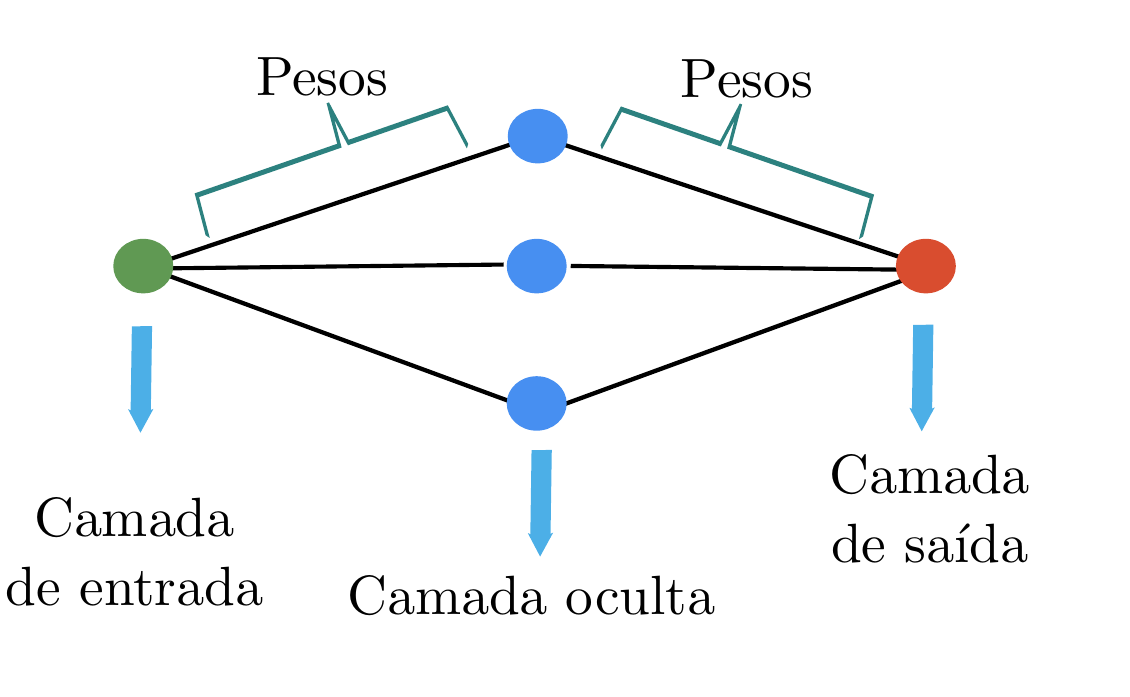

In [7]:
# Função de ativação sigmoid
Image(filename = "imagens/rede_mlp.png", width = 600, height = 300)

### Feed forward
O método de feed foward é o qual a rede neural irá produzir o sinal de saída, de forma que nesse método são utilizadas as entradas, os pesos, bias e a função de ativação de cada neurônio das camadas instanciadas. Dessa forma será propagado os sinais de entrada mediados pelos pesos, multiplicados pela função de ativação e ajustados pelo Bias de cada camada, nesse exemplo o bias é zero para simplificar o exemplo.

O sinal de saída $y_{ij}$ de um neurônio $i$ localizado na camada $j$ pode ser escrito da forma: 

$$ y_{ij} = f(\sum_{i=0}^n {X_{j}*W_{ij}}) $$

Na qual, $W_{ij}$ a representa o vetor de pesos da camada $j$ associado ao neurônio  de index $i$ dessa camada, $X_j$ o vetor de entrada da camada $j$ e consequentemente do neurônio $ij$ e a função $f(x)$ é a função de ativação, nesse notebook será utilizado a função sigmoid.
Para cada camada abaixo da camada de entrada, o vetor $X_i$ contem todas as os valores saídas $p_k$ dos neurônios da camada anterior. 

Nesse exemplo o vetor de entrada será um valor único, ou seja o vetor $W_{ij}$ do neurônio de index $ij$ é um valor único. Dessa forma, podemos equacionar o vetor de saída de cada camada $j$ da forma:

$$ \hat{Y}_j = f(X_j.W_j) $$

Assim é possivel achar a equação de saída para cada camada. Note que a camada de entrada só apresenta os valores para a rede e não tem valores de pesos associados, assim iniciaremos o equacionamento da camada escondida e após isso será equacionado a saída da camada de saída. Assim, falando que a camada escondida tem o indice $j=0$ temos:
$$ \hat{Y_0} = f(X_0.W_0) $$

Onde $X_0$ são as entradas introduzidas pela camada de entrada da rede neural. Agora vamos equacionar a camada de saída que possui o indice $j=1$:
$$ \hat{Y_1} = f(X_1.W_1)$$
$$ \hat{Y_1} = f(\hat{Y}_0.W_1)$$
$$\hat{Y_1} = f(f(X_0.W_0).W_1)$$
   
Assim temos a saída total da rede.

## Backpropagation
O ultimo passo no algorítimo de backpropagation é a retropropagação do erro. Nesse passo a rede neural atualiza os valores dos pesos considerando o erro da saída gerada pela rede e da saída desejada. Para fazer isso o algorítimo calcula a derivada parcial da função custo em relação aos pesos, nominalmente o gradiente da função custo. Vamos começar da ultima camada, $j = 1$ e calcular a derivada parcial da função custo em relação aos pesos $j$:
$$ \frac{\partial{MSE(Y,\hat{Y})}}{\partial{W_{1}}} $$

Onde $Y$ é a label ou saída desejada e $\hat{Y}_1$ é a saída da rede.

Para calcular essa derivada parcial vamos expandila utilizando a regra da cadeia:

$$
  \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{W_{ij}}}= \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{\hat{Y}_1}} \frac{\partial{\hat{Y}_1}}{\partial{z_1}} \frac{\partial{{z_1}}}{\partial{W_{1}}}
$$
Onde $z_1$ representa $W_1.X_1$ que também pode ser chamado de potencial de ativação.

Por partes, temos:
$$ \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{\hat{Y}_1}} =\frac{\partial{(Y - \hat{Y}_1)^2}}{\partial{\hat{Y}_1}}$$

Onde o MSE é a média do erro quadratico : $\frac{1}{n}\sum_{0}^{n-1} (Y -\hat{Y})$, como nesse exemplo a saída é unitária podemos retirar a somatória de termos de $Y$ e $\hat{Y}$. Assim a derivada do MSE em relação a $\hat{Y}$ fica:
$$ \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{\hat{Y}_1}} = 2(Y - \hat{Y}_1)$$

Para o segundo termo da regra da cadeia temos: 
$$\frac{\partial{\hat{Y}_1}}{\partial{z}_1} =  \frac{\partial{f(z_1)}}{\partial{z_1}} = f(z_1)'$$

Ou seja, o resultado do segundo termo é a derivada da função de ativação, assim esta vai ser a derivada da função sigmoid:

$$f(z_1)' = f(z_1) - (1- f(z_1))$$
  
Para o ultimo termo da regra da cadeia temos:

$$ \frac{\partial{z_1}}{\partial{W_1}} = \frac{\partial{W_1.X_1}}{\partial{W_1}} = X_1$$

Assim a solução dessa derivada parcial para a camada de saida fica como segue:

$$
  \frac{\partial{MSE(Y,\hat{Y_1})}}{\partial{W_1}} =  2(Y_1-\hat{Y_1}) . f(z_1)' .X_1.
$$

$$
  \frac{\partial{MSE(Y,\hat{Y_1})}}{\partial{W_1}} =  2(Y_1-\hat{Y_1}) . f(z_1)' .Y_0.
$$

Para a camada intermediária, com o index $j=0$, a derivada parcial tem que ser em relação aos pesos $W_0$, assim de forma semelhante a equação da derivada parcial fica:
$$
  \frac{\partial{MSE(Y,\hat{Y_1})}}{\partial{W_0}} = \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{\hat{Y}_1}} \frac{\partial{\hat{Y}_1}}{\partial{z_1}} \frac{\partial{{z_1}}}{\partial{\hat{Y}_{0}}} \frac{\partial{{\hat{Y}_0}}}{\partial{z_{0}}} \frac{\partial{{\hat{z}_0}}}{\partial{W_{0}}}.
$$

Com o único termo interamente novo sendo $\frac{\partial{{z_1}}}{\partial{\hat{Y}_{0}}}$, para soluciona-lo temos:
$$\frac{\partial{{z_1}}}{\partial{\hat{Y}_{0}}} = \frac{\partial{{W_1.Y_0}}}{\partial{\hat{Y}_{0}}} = W_1$$

Assim a solução da equação da derivada parcial para a camada intermediária fica:
$$ \frac{\partial{MSE(Y,\hat{Y_1})}}{\partial{W_0}} =  2(Y_1-\hat{Y_1}) . f(z_1)' .W_1 . f(z_0)'. X_0 $$

Por fim, após esses calculos o algorítimo de backpropagation pode atualizar cada vetor peso $W_{j}$, onde $\alpha$ representa a taxa de aprendizagem, a qual ajuda na convergência da rede.
$$
  W_{j} = W_{j} - \alpha \frac{\partial{MSE(Y,\hat{Y}_1)}}{\partial{W_{j}}}.
  \label{eq:w_adjust}
$$

In [8]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, n=15):
        """
        Definição de um objeto de rede neural

        argumentos:
        x: a entrada de treino
        y: a saída desejada no treino
        n: Número de neurônios na camada escondida
        """
        self.entrada = x
        self.pesos_0 = np.random.rand(self.entrada.shape[1],n)
        self.pesos_1 = np.random.rand(self.pesos_0.shape[1],1)
        self.y = y
        self.saida = np. zeros(y.shape)

    def feedforward(self):
        # Potencial de ativação ou termo z no equacionamento
        self.pot_ativ_0 = np.dot(self.entrada, self.pesos_0)
        
        # Saída da camada  0
        self.camada_0 = sigmoid(self.pot_ativ_0)
        
        # Equações da camada 1
        self.pot_ativ_1 = np.dot(self.camada_0, self.pesos_1)        
        self.camada_1 = sigmoid(self.pot_ativ_1)
        # Nota-se que a saída da camada 1 é a saída da rede
        
        return self.camada_1

    def backprop(self):
        d_pesos_1 = np.dot(self.camada_0.T, 2*(self.y - self.saida)*sigmoid_derivative(self.pot_ativ_1))
        d_pesos_0 = np.dot(self.entrada.T, np.dot(2*(self.y -self.saida)*sigmoid_derivative(self.pot_ativ_1), self.pesos_1.T)*sigmoid_derivative(self.pot_ativ_0))

        self.pesos_0 += d_pesos_o*0.1
        self.pesos_1 += d_pesos_1*0.1

    def train(self):
        self.saida = self.feedforward()
        self.backprop()
    
    def predict(self,x):
        self.entrada = x
        self.saida = self.feedforward()
        return self.saida
    
    def mostrar_pesos(self):
        matrix_pesos_0 = pd.DataFrame(self.pesos_0)
        matrix_pesos_1 = pd.DataFrame(self.pesos_1)
        print("Pesos 1")
        display(HTML(matrix_pesos_0.to_html()))
        print("Pesos2")
        display(HTML(matrix_pesos_1.to_html()))

## Treinando a rede neural 
Com a classe de rede neural MLP definida podemos gerar dados da equação da tenção do capacitor para treinar a rede. É importante notar que ciclo fechado do feedforward e backpropagation é chamado de época, e para treinar efetivamente uma rede neural é necessário várias épocas.

Para treinar essa rede vamos dividir 60% dos dados gerados pela função de tenção para treino e os restante para testar a acurácia de saída da rede.

In [9]:
# Definindo um modelo matemático
t = np.arange(0,3,0.1)
vc = Vc_RC(t)

t = t/np.amax(t)
# Dividindo os datasets de treino e teste
porcent_treino = 60
tam_treino = int(len(vc)*porcent_treino/100)

# Entrada e saída de treino
x_train = t[:tam_treino]
y_train = vc[:tam_treino]

# Entrada e saída de teste
x_test = t[tam_treino:]
y_test = vc[tam_treino:]

# Transformando os vetores entrada e saída em coluna 
x_train = x_train.reshape(tam_treino,1)
y_train = y_train.reshape(tam_treino,1)
x_test  = x_test.reshape(len(x_test),1)

# Definindo o objeto da rede neural
nn_vc_model = NeuralNetwork(x_train,y_train,n=15)


Uma forma de notar que a rede neural está aprendendo é notar a variação dos valores dos pesos no inicio e após as epocas de treinamento, assim veja os valores de peso iniciais:

In [10]:
# Mostrando os pesos antes do treino
nn_vc_model.mostrar_pesos()

Pesos 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.039553,0.415886,0.810665,0.688807,0.064985,0.877218,0.039342,0.581475,0.240179,0.08812,0.099834,0.604165,0.213154,0.195919,0.256301


Pesos2


,0
0,0.109904
1,0.665370
2,0.221265
3,0.459824
4,0.553188
5,0.063318
6,0.181312
7,0.791664
8,0.911726
9,0.843089


In [11]:
# Treinando a rede por 500 epocas
erro = list()

for i in range(500):
    saida_rede = nn_vc_model.feedforward() # calculando a saida da rede
    erro.append(mse(y_train, saida_rede)) # calculabdo o mse e guardando em um vetor
    nn_vc_model.train() # utilizando um metodo do objeto rede neural para treinar


NameError: name 'd_pesos_o' is not defined

Agora note a diferença dos pesos inicais e depois de 500 epocas de treinamento.

In [ ]:
# Mostrando os pesos das camadas
nn_vc_model.mostrar_pesos()

Uma maneira de visualizar a convergencia da rede é visualizar a função do erro em relação as epocas:

In [ ]:
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(erro,'r')
plt.xlabel("epoca")
plt.ylabel("erro quadratico médio")
plt.show()

Por fim vamos visualizar a saída da rede utilizando como entrada dados que ela não foi treinada:

In [ ]:
# transformando as matrizes de entrada em vetores para a plotagem
t          = t.flatten()
vc         = vc.flatten()

# Transformando a saida da rede neural para a plotagem
saida_rede = nn_vc_model.predict(x_test)

fig = plt.figure( figsize=(10, 6), dpi=80)
plt.plot(x_test.flatten(), y_test, 'b', label="tensão VC calculada")
plt.plot(x_test.flatten(), saida_rede, 'r', label="tensão VC rede")
plt.legend()
plt.grid()
plt.xlabel("tempo")
plt.ylabel("tensão")
plt.show()

## Considerações finais
Com isso temos o processo completo de criação de uma rede neural simples de 1 neurônio de entrada e saída, com a pissibilidade de vários neurônios na camada escondida. Assim podemos resolver problemas simplórios e analizar o comportamento do treinamento da rede de ponta a ponta, para aplicações mais robustas existem soluções mais utilizadas no mercado, como o tensorflow e o pytorch.